<a href="https://colab.research.google.com/github/SiriBatchu/CMPE-255-HW3/blob/main/MultiClassClassification_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 573.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

In [2]:
pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 23.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of selenium to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

In [7]:
# loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data=get_data('questions')

,CAT_1_Freq,CAT_2_Freq,CAT_3_Freq,Next_Question
0,0.483696,0.391304,0.125000,1
1,0.316583,0.286432,0.396985,2
2,0.267176,0.534351,0.198473,1
3,0.521739,0.417391,0.060870,1
4,0.476923,0.446154,0.076923,1


In [8]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'Next_Question', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Next_Question
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(499, 4)"
5,Transformed data shape,"(499, 4)"
6,Transformed train set shape,"(349, 4)"
7,Transformed test set shape,"(150, 4)"
8,Numeric features,3
9,Preprocess,True


In [9]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [10]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [13]:
# init setup on exp
exp.setup(data, target = 'Next_Question', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Next_Question
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(499, 4)"
5,Transformed data shape,"(499, 4)"
6,Transformed train set shape,"(349, 4)"
7,Transformed test set shape,"(150, 4)"
8,Numeric features,3
9,Preprocess,True


In [14]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6705,0.0000,0.6705,0.5727,0.5796,0.1152,0.1552,0.8000
knn,K Neighbors Classifier,0.6704,0.6493,0.6704,0.6064,0.6208,0.2080,0.2310,0.0960
ridge,Ridge Classifier,0.6676,0.0000,0.6676,0.5511,0.5731,0.1007,0.1282,0.0390
lda,Linear Discriminant Analysis,0.6647,0.0000,0.6647,0.5740,0.5894,0.1407,0.1706,0.0600
dummy,Dummy Classifier,0.6561,0.5000,0.6561,0.4305,0.5199,0.0000,0.0000,0.0370
svm,SVM - Linear Kernel,0.6447,0.0000,0.6447,0.5217,0.5670,0.1073,0.1180,0.0930
nb,Naive Bayes,0.6418,0.7020,0.6418,0.5983,0.6053,0.1872,0.1996,0.0590
rf,Random Forest Classifier,0.6359,0.6810,0.6359,0.5919,0.6068,0.1958,0.2012,0.2310
lightgbm,Light Gradient Boosting Machine,0.6358,0.6530,0.6358,0.5904,0.6061,0.1983,0.2003,0.1550
ada,Ada Boost Classifier,0.6276,0.0000,0.6276,0.5793,0.5899,0.1603,0.1749,0.1340


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [15]:
# compare models using OOP
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6705,0.0000,0.6705,0.5727,0.5796,0.1152,0.1552,0.0660
knn,K Neighbors Classifier,0.6704,0.6493,0.6704,0.6064,0.6208,0.2080,0.2310,0.0520
ridge,Ridge Classifier,0.6676,0.0000,0.6676,0.5511,0.5731,0.1007,0.1282,0.0590
lda,Linear Discriminant Analysis,0.6647,0.0000,0.6647,0.5740,0.5894,0.1407,0.1706,0.0320
dummy,Dummy Classifier,0.6561,0.5000,0.6561,0.4305,0.5199,0.0000,0.0000,0.0310
svm,SVM - Linear Kernel,0.6447,0.0000,0.6447,0.5217,0.5670,0.1073,0.1180,0.0730
nb,Naive Bayes,0.6418,0.7020,0.6418,0.5983,0.6053,0.1872,0.1996,0.0340
rf,Random Forest Classifier,0.6359,0.6810,0.6359,0.5919,0.6068,0.1958,0.2012,0.4320
lightgbm,Light Gradient Boosting Machine,0.6358,0.6530,0.6358,0.5904,0.6061,0.1983,0.2003,0.2190
ada,Ada Boost Classifier,0.6276,0.0000,0.6276,0.5793,0.5899,0.1603,0.1749,0.1350


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

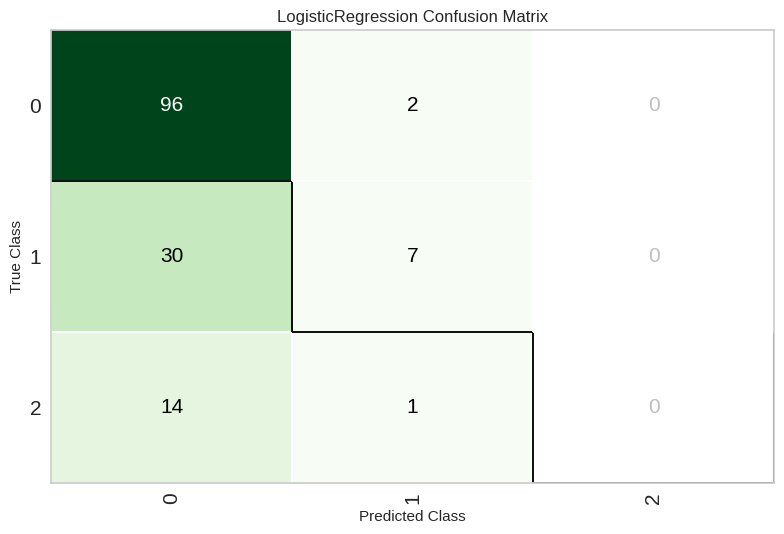

In [16]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

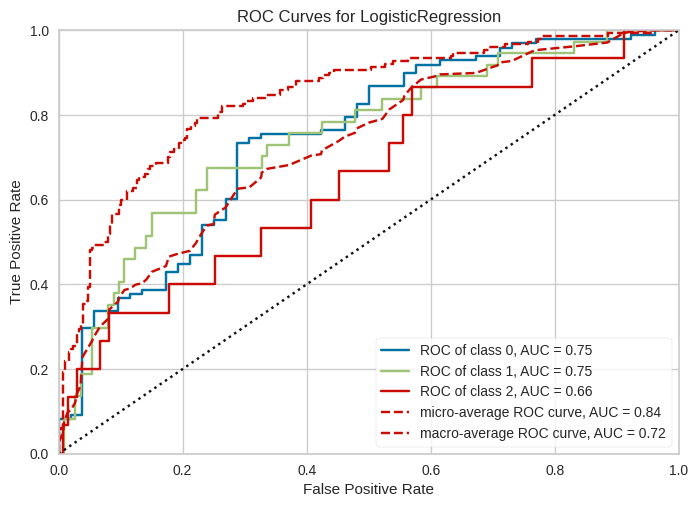

In [17]:
# plot AUC
plot_model(best, plot = 'auc')

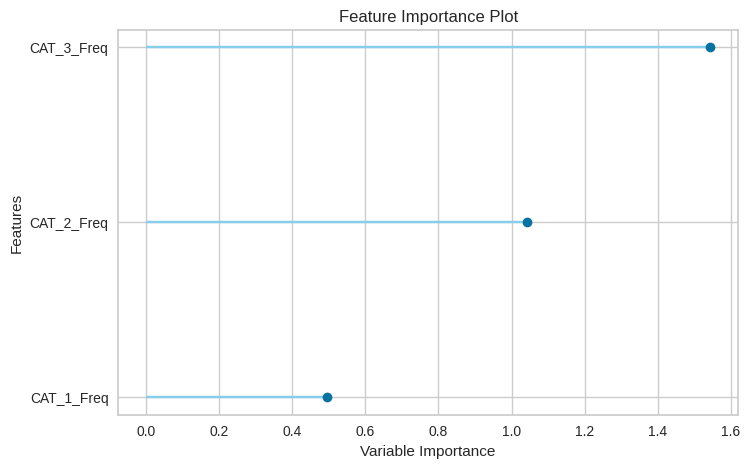

In [18]:
# plot feature importance
plot_model(best, plot = 'feature')

In [19]:
# check docstring to see available plots
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

In [20]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [21]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6867,0,0.6867,0.6207,0.6005,0.1617,0.2418


In [22]:
# show predictions df
holdout_pred.head()

,CAT_1_Freq,CAT_2_Freq,CAT_3_Freq,Next_Question,prediction_label,prediction_score
333,0.262097,0.342742,0.395161,2,1,0.6403
201,0.413043,0.369565,0.217391,1,1,0.7511
53,0.532051,0.352564,0.115385,1,1,0.7943
72,0.050000,0.490000,0.460000,3,1,0.6370
3,0.521739,0.417391,0.060870,1,1,0.8324


In [23]:
# copy data and drop Class variable

new_data = data.copy()
new_data.drop('Next_Question', axis=1, inplace=True)
new_data.head()

,CAT_1_Freq,CAT_2_Freq,CAT_3_Freq
0,0.483696,0.391304,0.125000
1,0.316583,0.286432,0.396985
2,0.267176,0.534351,0.198473
3,0.521739,0.417391,0.060870
4,0.476923,0.446154,0.076923


In [24]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,CAT_1_Freq,CAT_2_Freq,CAT_3_Freq,prediction_label,prediction_score
0,0.483696,0.391304,0.125000,1,0.8003
1,0.316583,0.286432,0.396985,1,0.6198
2,0.267176,0.534351,0.198473,1,0.7991
3,0.521739,0.417391,0.060870,1,0.8324
4,0.476923,0.446154,0.076923,1,0.8326


In [25]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['CAT_1_Freq', 'CAT_2_Freq',
                                              'CAT_3_Freq'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               mi...
                                                               fill_value=None,
                                                               keep_

In [26]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['CAT_1_Freq', 'CAT_2_Freq',
                                             'CAT_3_Freq'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_featur...
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('trained_model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=123,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)